In [2]:
import numpy as np
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import itertools
import matplotlib
from matplotlib import markers
import matplotlib.transforms as transforms

In [3]:
datafile = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/manual_alldices4.csv")
datafile2 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/dl_alldices4.csv")
datafile3 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/alldices4.csv")

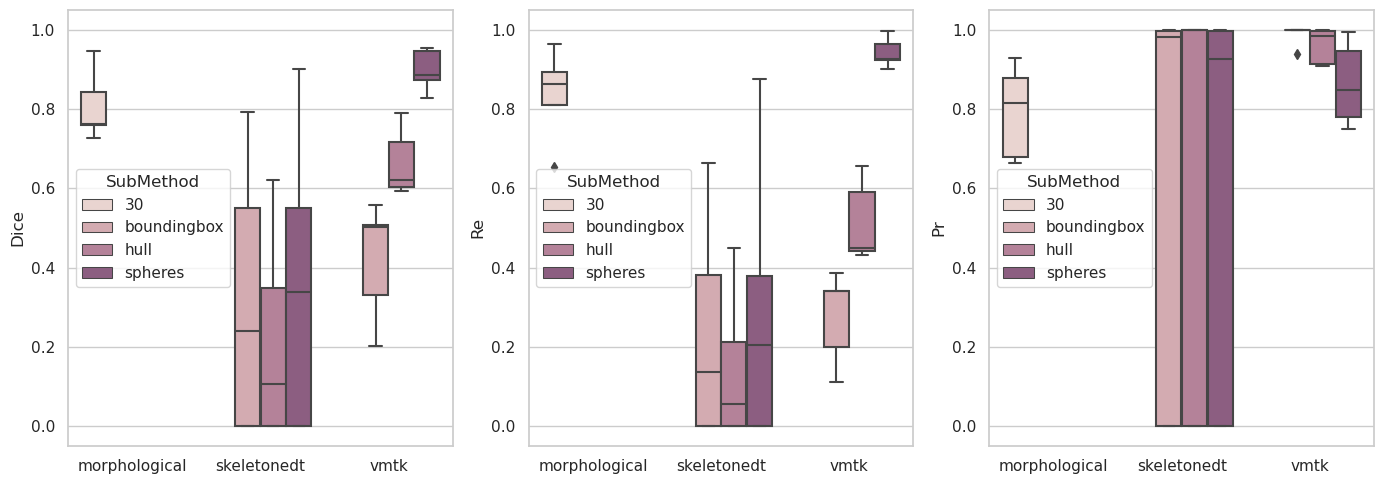

In [39]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

sns.set_theme(style="whitegrid",font_scale = 1)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

plt.setp(axes, xticks=list(np.arange(0, 1.2, 0.2)),
        yticks=list(np.arange(0, 1.2, 0.2)), xlim=[-0.05,1.05], ylim=[-0.05,1.05])
sns.set_style("ticks")
dice= sns.boxplot(ax=axes[0],x='Method',y='Dice', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
recall= sns.boxplot(ax=axes[1],x='Method',y='Re', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
precision= sns.boxplot(ax=axes[2],x='Method',y='Pr', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)


dice.set_xlabel( '')
recall.set_xlabel( '')
precision.set_xlabel( '')
plt.legend(title='SubMethod')
plt.tight_layout()
#plt.savefig('ablation_OC.pdf')

ValueError: Could not interpret input 'Dice'

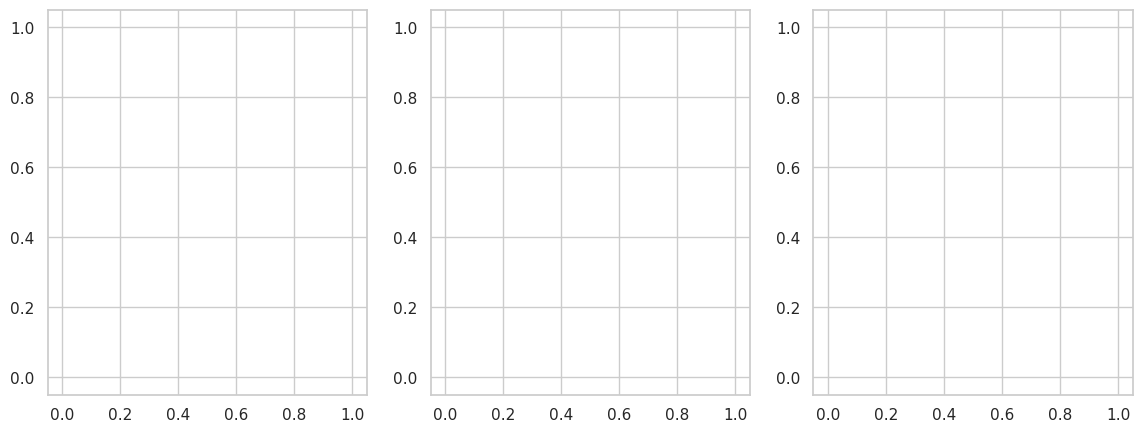

In [47]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

sns.set_theme(style="whitegrid",font_scale = 1)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

plt.setp(axes, xticks=list(np.arange(0, 1.2, 0.2)),
        yticks=list(np.arange(0, 1.2, 0.2)), xlim=[-0.05,1.05], ylim=[-0.05,1.05])

dice= sns.boxplot(ax=axes[0],x='Method',y='Dice', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
recall= sns.boxplot(ax=axes[1],x='Method',y='Re', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
precision= sns.boxplot(ax=axes[2],x='Method',y='Pr', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)

hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
numSM = len(datafile.SubMethod.unique())
print(numSM)
allplots=[dice, recall, precision]
for metric in allplots:
        hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
        for i, bar in enumerate(metric.patches):
                if i % numSM == 0:
                        hatch = next(hatches)
                bar.set_hatch(hatch)
        metric.set_xlabel( '')
plt.legend(title='SubMethod')
plt.tight_layout()
plt.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldices2.eps")

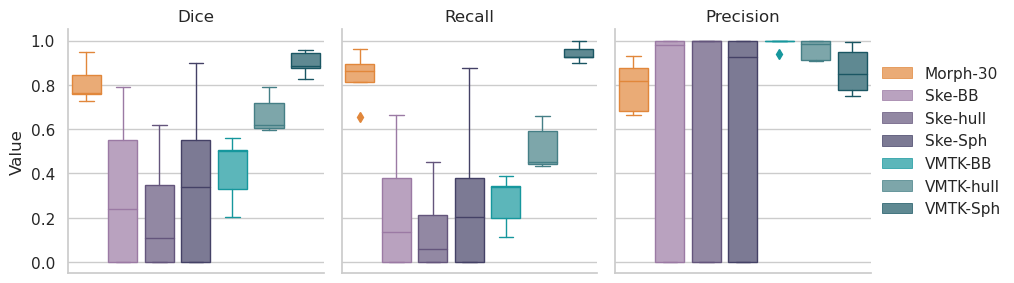

In [206]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')


sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.boxplot, x='Method',y='Value', hue='Method', dodge=False,linewidth=1.0, palette=palette)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        for i,artist in enumerate(ax.patches):
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.7
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1

dice.add_legend()
dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicesbox.eps")


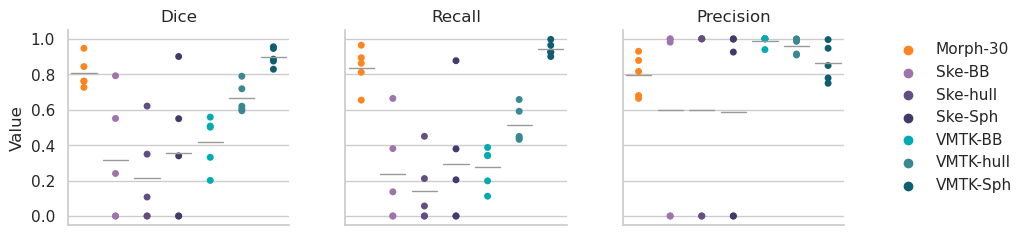

In [227]:
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.stripplot, x='Method',y='Value', hue='Method', dodge=False,palette=palette, jitter=False)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
dice.set(xlabel=None,xticklabels=[])
dice.add_legend()

# plot the mean line
dice.map_dataframe(sns.boxplot,showmeans=True,
                meanline=True,
                meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x="Method",
                y="Value",
                data=datafile,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=ax)

dice.set(xlabel=None,xticklabels=[])
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicespoint.eps")

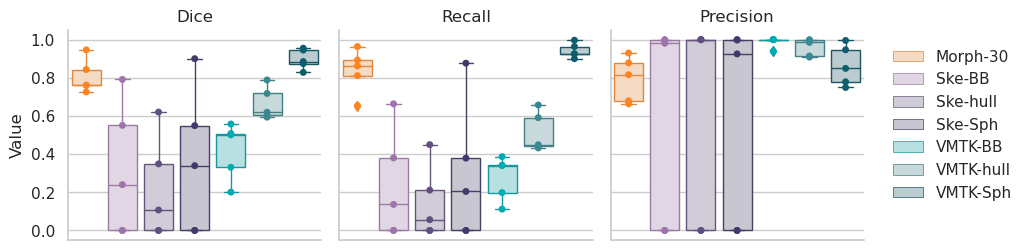

In [229]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')


sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.boxplot, x='Method',y='Value', hue='Method', dodge=False,linewidth=1.0, palette=palette)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        for i,artist in enumerate(ax.patches):
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.3
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1

dice.add_legend()
dice.map_dataframe(sns.stripplot,jitter=False,
                x="Method",
                y="Value",
                palette=palette,
                hue="Method",
                data=datafile,             
                ax=ax)

dice.set(xlabel=None,xticklabels=[])
        #sns.stripplot(x='Method',y='Value', hue='Method', dodge=False,palette=palette, jitter=False, ax=ax)
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicesbox.eps")


AxesSubplot(0.05075,0.1335;0.26282x0.789833)
[]
AxesSubplot(0.34581,0.1335;0.26282x0.789833)
[]
AxesSubplot(0.64087,0.1335;0.26282x0.789833)
[]


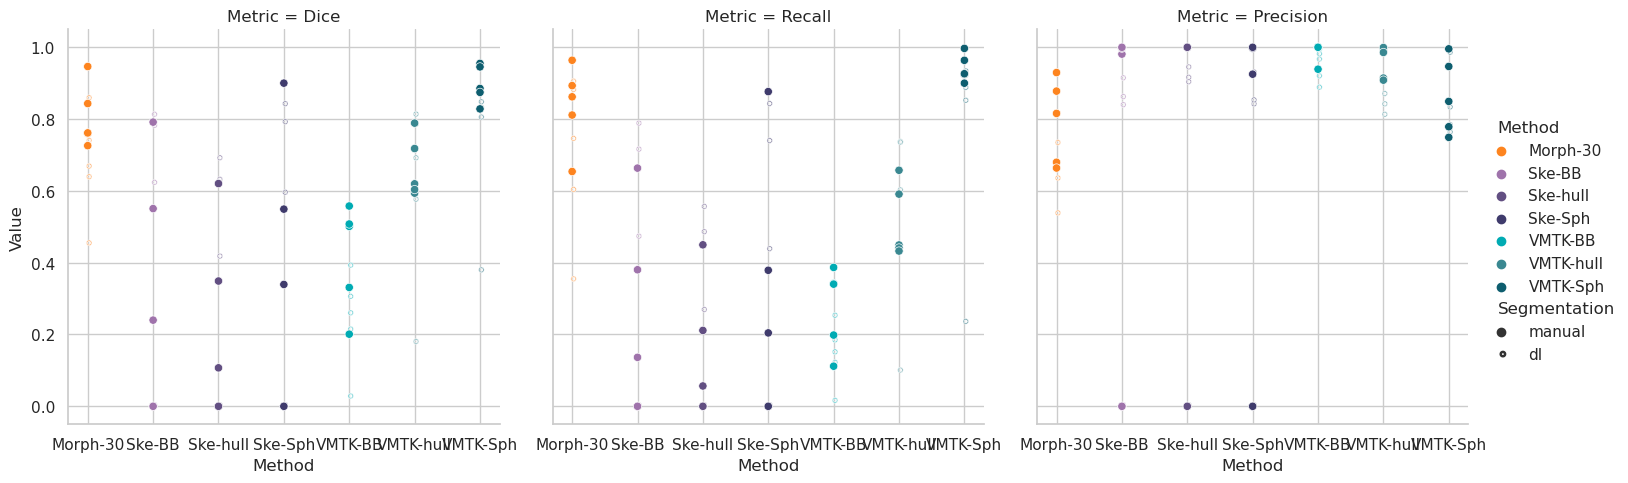

In [270]:
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]

manual = datafile3[datafile3["Segmentation"]=="manual"]
dl = datafile3[datafile3["Segmentation"]=="dl"]

markerstyle = ["o","$\circ$"]
markerstyle2 = ["p","p"]
edgecolors = ["face","none"]
linewidth=1.0

sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.relplot(datafile3, col="Metric", x='Method',
        y='Value', hue='Method', 
        palette=palette, 
        style="Segmentation",
        style_order=["manual", "dl"],
        markers=markerstyle,
        edgecolors=edgecolors)

dice2 = sns.scatterplot(data=datafile3,
        x="Method",
        y='Value', hue='Method', 
        palette=palette, 
        style="Segmentation",
        style_order=["manual", "dl"],
        markers=markerstyle2,
        ax=dice.axes[0])

for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        print(ax)
        print(ax.figure.patches)
        for i,artist in enumerate(ax.patches):
                print(artist)
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.7
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1        
# dice.set_axis_labels("", "Value")
# dice.set(xlabel=None,xticklabels=[])
# dice.set_titles("{col_name}")
# dice.set_xlabels("")
# dice.tight_layout()
# dice.set(xlabel=None,xticklabels=[])
# dice.add_legend()

# dice.map_dataframe(sns.stripplot, 
#                     x='Method',
#                     y='Value', 
#                     hue='Method', 
#                     dodge=False,
#                     palette=palette, 
#                     jitter=False,
#                     data=datafile2,
#                     ax=ax)

# # plot the mean line
# dice.map_dataframe(sns.boxplot,showmeans=True,
#                 meanline=True,
#                 meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
#                 medianprops={'visible': False},
#                 whiskerprops={'visible': False},
#                 zorder=10,
#                 x="Method",
#                 y="Value",
#                 data=datafile,
#                 showfliers=False,
#                 showbox=False,
#                 showcaps=False,
#                 ax=ax)

# dice.set(xlabel=None,xticklabels=[])
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicespoint.eps")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.textpath import TextPath
from matplotlib.colors import Normalize

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size=N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),
             ax=ax, label="Normalized Thrust [a.u.]")
ax.set_xlabel("X position [m]")
ax.set_ylabel("Y position [m]")

plt.show()

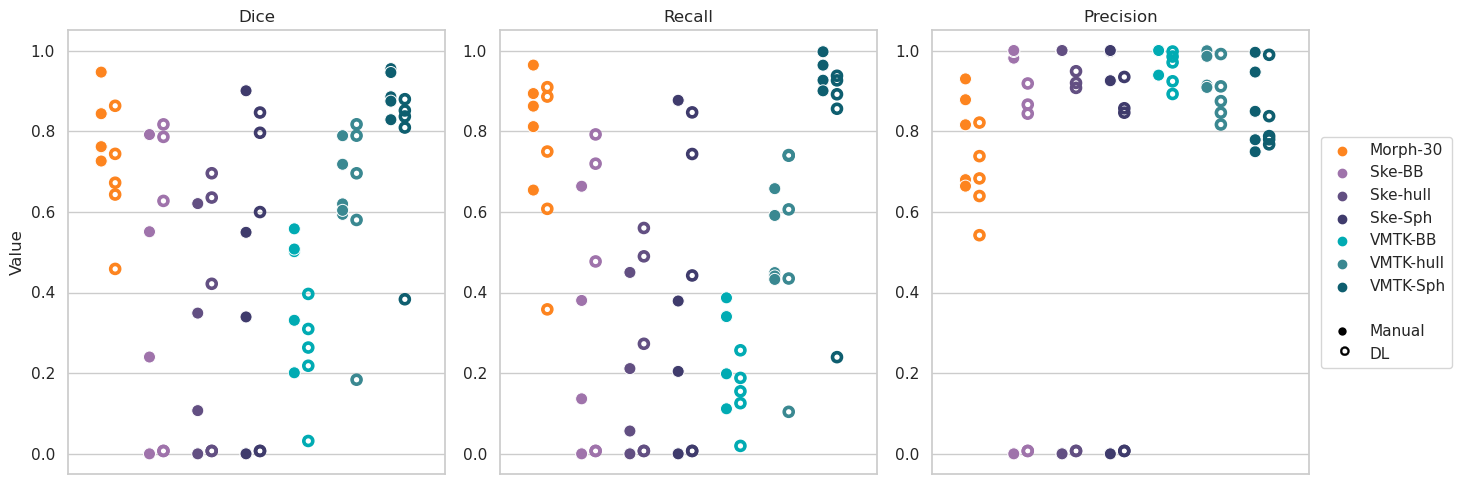

In [16]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]

paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
manual = datafile3[datafile3["Segmentation"]=="manual"]
dl = datafile3[datafile3["Segmentation"]=="dl"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.8,7.0], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location


pnts = np.linspace(0, np.pi * 2.0, 40)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .55]
open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}


for ax in range(i):
        subm = datafile[datafile["Metric"] == metrics[ax]]
        subd = datafile2[datafile2["Metric"] == metrics[ax]]
        #subdummy = datafile2[datafile2["Metric"] == metrics[ax]]
        #subdummy[subd["Value"] >0] = 0
        axes[ax].set_title(metrics[ax])
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subm, palette=palette, ax=axes[ax],s=75,transform=axes[ax].transData-offset(4))
        sns.scatterplot(x='Method',y=0, hue="Method", data=subm, palette=paletteg, ax=axes[ax], legend=False,s=0, marker="+", lw=0)
        # sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=80, 
        #                         marker=open_circle,lw=0,transform=axes[ax].transData+offset(5))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=150, marker="$\circ$", lw=.5, ec="face",
                                transform=axes[ax].transData+offset(4))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        axes[ax].set_ylabel("")
axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([plt.Line2D([0,0],[0,0],
                      linestyle=''),plt.Line2D([0,0],[0,0], markeredgecolor="none",
                      marker='o', markerfacecolor='black',
                      mew=0.3,
                      linestyle=''),plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker="$\circ$", markerfacecolor='black', markersize=10,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend(["", "Manual", "DL"])
for ax in axes:
        ax.get_legend().remove()
plt.legend(handles, labels, bbox_to_anchor=(1.4, 0.5), loc="center right")
# hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
# numSM = len(datafile.SubMethod.unique())
# print(numSM)
# allplots=[dice, recall, precision]
# for metric in allplots:
#         hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
#         for i, bar in enumerate(metric.patches):
#                 if i % numSM == 0:
#                         hatch = next(hatches)
#                 bar.set_hatch(hatch)
#         metric.set_xlabel( '')
# plt.legend(title='SubMethod')
plt.tight_layout()
# plt.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldices2.eps")